<img style="float: right;" width="120" src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>

# Synopsis

Some of the following content may be quite advanced if you have no background in statistics.

Do not panic about this, just be aware that there are some very fast and efficient libraries available for number crunching using python.

This notebook will explain the following topics and concepts:

- **Built in Statistical Functions** 

- **Correlation & Covariance**

- **Function application**
  - Applying a function to rows of a DataFrame

- **Common Front Office Calculations**
  - Normalized prices
  - the log of returns
  - Daily Percentage Change
  - Cumulative returns
  - macd - Moving Average Convergence/Divergence



# Built in Statistical Functions

The following functions can all be applied to a Series.

As a column is a Series, they can all be applied to a column or columns of a DataFrame or even an entire DataFrame

- Simple Functions
- Accumulators
- General Purpose Functions

In [1]:
# Import pandas, numpy, matplotlib.pyplot
import pandas as pd

import numpy as np

import matplotlib.pyplot as pt

# call the matplotlib inline magic
%matplotlib inline

## Simple Functions


- count() 
- min() 
- max() 
- sum() 
- mean()
- median() 
- std() 
- describe()

In [2]:
# Create a demonstration Series and call some of it's aggregation functions
tmp = pd.Series([13, 2, 4, 24, 9, 25, 6, 50])

# Use print to display the result of each function

# count, min, max, sum, mean, mediam, std

In [3]:
# describe() gives a number of statistical values in one function


## accumulators

- cumsum()
- cummin()
- cummax()
- cumprod()

In [4]:
# Use print to display the result of each function ('\n' inserts a new line for readability)

# cumsum, cummin, cummax, cumprod

## General purpose Functions

There are also a few general purpose functions

- diff()  - difference between adjacent values
- pct_change() - percentage change between adjacent values
- idxmin() - numerical index of minimum value in series (Series begin at index 0)
- idxmax() - numerical index of maximum value in series
- skew() (unbiased skew <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html">docs</a>)
- kurt() (unbiased kurtosis <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurt.html">docs</a>)
- quantile() (returns values at the given quantile <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html">docs</a>)

In [5]:
# Use print to display the result of each function ('\n' inserts a new line for readability)

# diff, pct_change, idxmin, idxmax, skew, kurt, quantile

print('diff:', tmp.diff())
print('pct_change:', tmp.pct_change())
print('idxmin:', tmp.idxmin())
print('idxmax:', tmp.idxmax())
print('skew:', tmp.skew())
print('kurt:', tmp.kurt())
print('quantile:', tmp.quantile()) # defaults to 50% quantile (0.5)

diff: 0     NaN
1   -11.0
2     2.0
3    20.0
4   -15.0
5    16.0
6   -19.0
7    44.0
dtype: float64
pct_change: 0         NaN
1   -0.846154
2    1.000000
3    5.000000
4   -0.625000
5    1.777778
6   -0.760000
7    7.333333
dtype: float64
idxmin: 1
idxmax: 7
skew: 1.4524005564431457
kurt: 2.059695914294438
quantile: 11.0


# Import Data

In [3]:
# Load in the famous FANG stocks, make sure the index is the Date and it's sorted ascending
df_FB = pd.read_excel(io='https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/market_data.xls', sheet_name='FB', parse_dates=True, index_col='Date')
df_AMZN = pd.read_excel(io='https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/market_data.xls', sheet_name='AMZN', parse_dates=True, index_col='Date')
df_AAPL = pd.read_excel(io='https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/market_data.xls', sheet_name='AAPL', parse_dates=True, index_col='Date')

# Common Front Office Calculations


**Common Front Office Calculations**
- Normalized prices
- the log of returns
- Daily Percentage Change
- Cumulative returns
- macd - Moving Average Convergence/Divergence

## Visualizing Returns

### 1 - Look at the  Closing Prices

<AxesSubplot:xlabel='Date'>

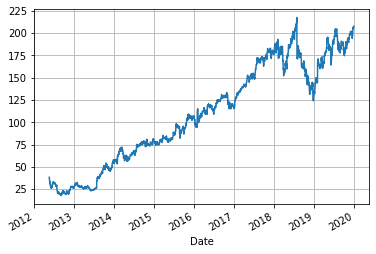

In [7]:
# plot the Adj Close column
df = pd.DataFrame()

df['FB'] = df_FB['Adj Close']

df['FB'].plot(grid=True)

### 2 - Look at Normalized Prices

The difference between price(t0) and price (t+1)

This is the same as cumulative daily returns

<AxesSubplot:xlabel='Date'>

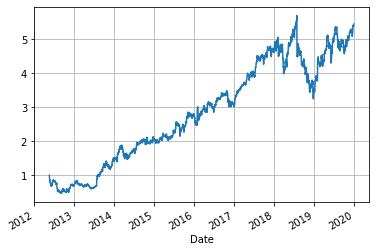

In [8]:
df['NormdP'] = df['FB']/df.iloc[0]['FB']

df['NormdP'].plot(grid=True)

### 3 - Look at Returns

- When calculating the return of an investment or position, the product of daily returns can be used.

- This allows a direct comparison to be made between different instruments

- This is a very simple value to arrive at

- price / price(t-1)

- price(t-1) arrived at by using the time shift functions

- Use the `cumprod()` function to arrive at the payoff



Date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
Name: FB, dtype: float64

Date
2012-05-18          NaN
2012-05-21    38.230000
2012-05-22    34.029999
2012-05-23    31.000000
2012-05-24    32.000000
Name: FB, dtype: float64

<AxesSubplot:xlabel='Date'>

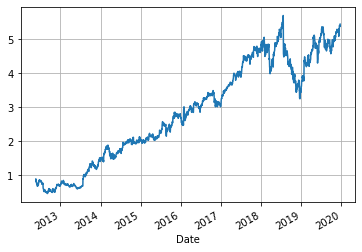

In [9]:
# demonstrate the shift function
display(df['FB'].head())
display(df['FB'].shift(1).head())
( df['FB'] / df['FB'].shift(1) ).cumprod().plot(grid=True)

<AxesSubplot:xlabel='Date'>

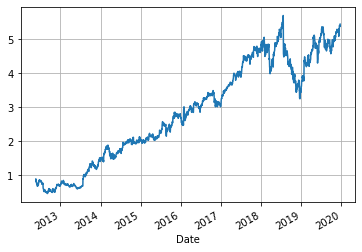

In [10]:
df['Returns'] = df['FB'] / df['FB'].shift(1)

df['Returns'].cumprod().plot(grid=True)

### 4 - Look at the Log of the Daily Returns

- Log of returns is time additive and so can summed over any periods. (<a href="https://www.youtube.com/watch?v=PtoUlt3V0CI" target="_blank">Brief explanation of log of returns</a>)

- Used more frequently than product of returns (above)

- When calculating the return of an investment or position, an accumulation of the log of daily returns is used.

- This allows a direct comparison to be made between different instruments

- This is a very simple value to arrive at

- log (price / price(t-1))

- Use a combination of np.log and the time shift functions

- Use the **cumsum()** function to arrive at the payoff

- Where there is a choice between adjusted and unadjusted, use the Adjusted values (e.g. AdjOpen, AdjVolume, etc.)


- Note the use of the `apply` function - this sends every value in a column to another function. In this case we send every value to the numpy `exp` function.

<AxesSubplot:xlabel='Date'>

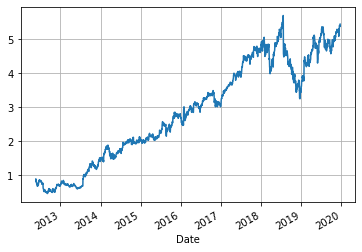

In [11]:
# Returns for Facebook
# Have the Adjusted Close so use that
df['Log Returns'] = np.log(df['FB'] / df['FB'].shift(1))

# Plot returns for both for a direct comparison
# applying the exponential function to the accumulator
# Very very common in financial analysis

# we're using np.exp to get the exponential of the cumulative sum for plotting

df['Log Returns'].cumsum().apply(np.exp).plot(grid=True)

### 5 - Look at Cumulative Returns

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Reached by multiplying previous investment at i at t-1 by 1+ percent returns. <BR>
Easy to calculate using pandas with its `cumprod()` method. 


<AxesSubplot:xlabel='Date'>

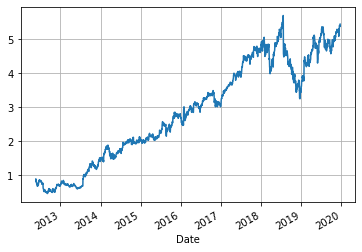

In [12]:
df['Cumulative Return'] = (1 + df['FB'].pct_change()).cumprod()

df.head()

df['Cumulative Return'].plot(grid=True)

## Daily Percentage Change

Defined by the following formula: $ r_t = \frac{p_t}{p_{t-1}} -1$ <BR>
    
>
> The percent gain (or loss) if you bought the stock on day and then sold it the next day. <BR>
> Very useful in analyzing the volatility of the stock. <BR>
> A wide distribution implies the stock is more volatile from one day to the next<BR>
>
    
2 Methods
- Use `shift()`
- Use built in `pct_change()`

<AxesSubplot:xlabel='Date'>

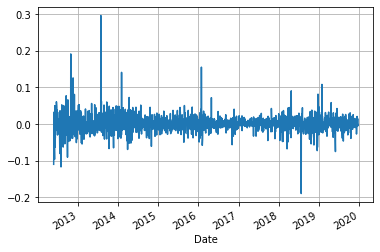

In [13]:
# Using Shift
df['R_t'] = (df['FB'] / df['FB'].shift(1) ) - 1

df['R_t'].plot(grid=True)

<AxesSubplot:xlabel='Date'>

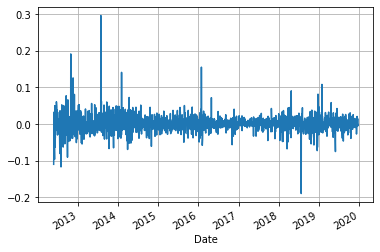

In [14]:
# Using pct_change
df['Pct Chg'] = df['FB'].pct_change()

df['Pct Chg'].plot(grid=True)

## MACD

A quick reminder...

Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.

- Turns two moving averages into a momentum oscillator by subtracting the longer moving average from the shorter moving average. 
- Results in the best of both worlds: trend following and momentum.
- MACD formula : (12-day EMA - 26-day EMA)
- Uses the pandas ewma function (exponentially weighted moving average) (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html" target="_blank">Pandas documentation - ewm</a>)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Date'>

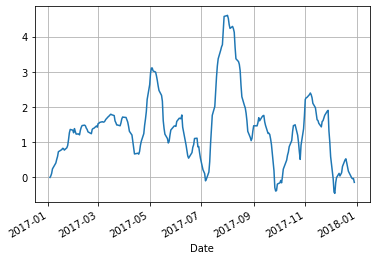

In [15]:
# Facebook 2017
df_MACD = pd.DataFrame()
df_MACD['26 ewm'] = df_FB['2017']['Close'].ewm(span=26).mean()
df_MACD['12 ewm'] = df_FB['2017']['Close'].ewm(span=12).mean()
df_MACD['MACD'] = df_MACD['12 ewm'] - df_MACD['26 ewm']

# plot MACD
df_MACD['MACD'].plot(grid=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


<AxesSubplot:xlabel='Date'>

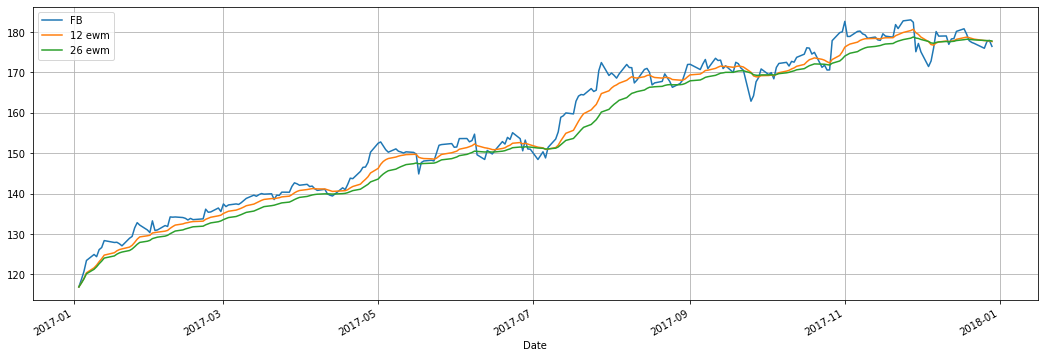

In [16]:
# plot relationship between Close prices, 12 ewm and 26 ewm
df_MACD['FB'] = df_FB['2017']['Close']
df_MACD[ ['FB', '12 ewm', '26 ewm'] ].plot(grid=True, figsize=(18, 6))

# Correlation and Co-Variance

A quick reminder....

Covariance measures whether a variation in one variable results in a variation in another variable; for example, looking at whether an increase in one variable results in an increase, decrease, or no change in the other variable.

Correlation measures the direction as well as the strength of the relationship between two variables (i.e. how strongly these two variables are related to each other).

- Pandas has some convenient built-ins for calculating these.

- We'll Use some previous datasets for demonstration.

- Calculate the correlation and covariance between the daily percentage change of the Adjusted Close price of FANG Stocks and Gold Futures.

- Display the correlation

- Calculate the covariance of the same data

In [4]:
# get pct change of FB, Apple and Amazon
df_CORR = pd.DataFrame()

df_CORR['Facebook'] = df_FB['Close'].pct_change()
df_CORR['Apple'] = df_AAPL['Close'].pct_change()
df_CORR['Amazon'] = df_AMZN['Close'].pct_change()

df_CORR.head()

,Facebook,Apple,Amazon
Date,,,
2012-05-18,NaN,0.000490,-0.020654
2012-05-21,-0.109861,0.058260,0.019920
2012-05-22,-0.089039,-0.007679,-0.012746
2012-05-23,0.032258,0.024400,0.009056
2012-05-24,0.032187,-0.009184,-0.009389


## Calculate correlation and covariance

- Use the **corr()** function
- Use the **cov()** function



In [5]:
df_CORR.corr()

# OR for a more recent correlation
display(df_CORR['2017'].corr())

# Covariance
display(df_CORR['2017'].cov())


/var/folders/j3/4cf_n6d16qvfh74j5qyvdwrc0000gn/T/ipykernel_43368/1819185326.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  display(df_CORR['2017'].corr())


,Facebook,Apple,Amazon
Facebook,1.000000,0.544823,0.653030
Apple,0.544823,1.000000,0.511137
Amazon,0.653030,0.511137,1.000000


/var/folders/j3/4cf_n6d16qvfh74j5qyvdwrc0000gn/T/ipykernel_43368/1819185326.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  display(df_CORR['2017'].cov())


,Facebook,Apple,Amazon
Facebook,0.000115,0.000065,0.000092
Apple,0.000065,0.000124,0.000075
Amazon,0.000092,0.000075,0.000174


## Use a scatter plot to display a visual of correlation


/var/folders/j3/4cf_n6d16qvfh74j5qyvdwrc0000gn/T/ipykernel_43368/4007663986.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  p = scatter_matrix(df_CORR['2017'], alpha=0.9, hist_kwds={'bins':50}, figsize=(18,6))


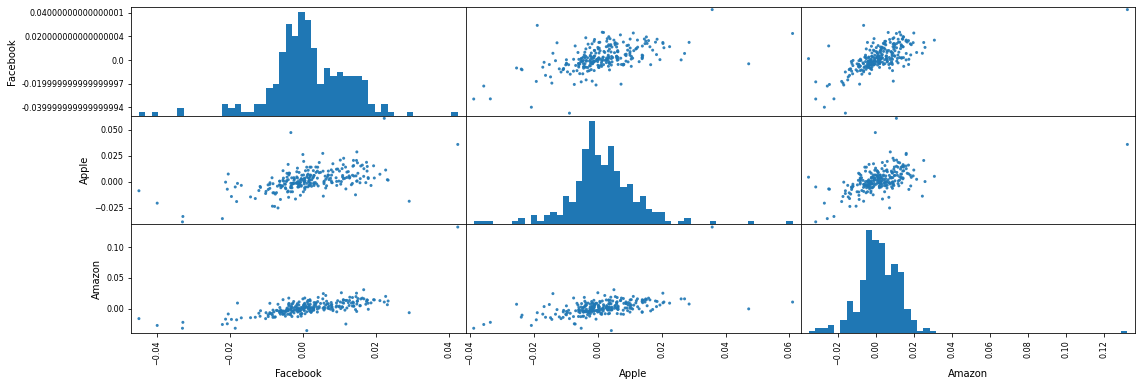

In [6]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(df_CORR['2017'], alpha=0.9, hist_kwds={'bins':50}, figsize=(18,6))

## Rolling Correlations

Here we're using the `rolling` function from Pandas. This gives a rolling window over the last X samples. An aggregate function can then be applied to that rolling window.

Similar to the cumulative functions (cumsum, cumprod etc.) However in this case the window size remains fixed.

In [7]:
# get sum of a rolling window of size 3
df_tmp = df_CORR[ ['Facebook'] ]
df_tmp['Rolling Sum'] = df_CORR[ ['Facebook'] ].rolling(3).sum()

df_tmp

/var/folders/j3/4cf_n6d16qvfh74j5qyvdwrc0000gn/T/ipykernel_43368/290898534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['Rolling Sum'] = df_CORR[ ['Facebook'] ].rolling(3).sum()


,Facebook,Rolling Sum
Date,,
2012-05-18,NaN,NaN
2012-05-21,-0.109861,NaN
2012-05-22,-0.089039,NaN
2012-05-23,0.032258,-0.166642
2012-05-24,0.032187,-0.024594
...,...,...
2019-12-19,0.017580,0.040672
2019-12-20,0.001165,0.039462
2019-12-23,-0.000582,0.018163


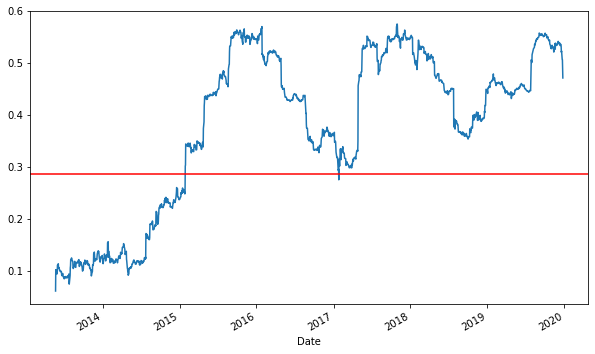

In [8]:
## Rolling Correlations

ax = df_CORR['Facebook'].rolling(window=252).corr(df_CORR['Apple']).plot(figsize=(10, 6))  

# This line shows the corralation of Facebook and Apple over the entire time period
# Note how the rolling correlation is much more telling


ax.axhline(df_CORR.corr().iloc[0, 1], c='r');  

## Rolling Covariances

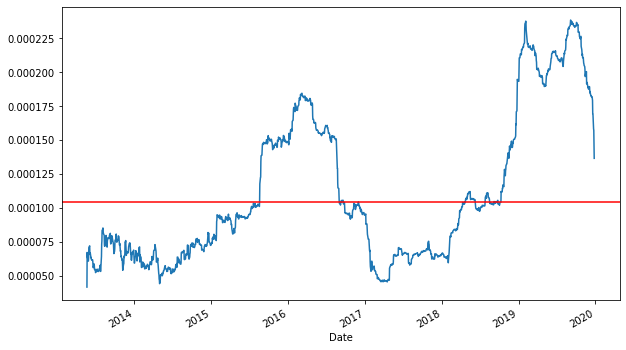

In [22]:
## Rolling Covarianbce

ax = df_CORR['Facebook'].rolling(window=252).cov(df_CORR['Apple']).plot(figsize=(10, 6))  

# This line shows the covariance of Facebook and Apple over the entire time period
# Note how the rolling covariance is much more telling


ax.axhline(df_CORR.cov().iloc[0, 1], c='r');  